In [2]:
import pandas as pd
data = pd.read_csv('sample_complaints.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 19 columns):
Unnamed: 0                      200 non-null int64
Date received                   200 non-null object
Product                         200 non-null object
Sub-product                     166 non-null object
Issue                           200 non-null object
Sub-issue                       90 non-null object
Consumer complaint narrative    35 non-null object
Company public response         67 non-null object
Company                         200 non-null object
State                           194 non-null object
ZIP code                        182 non-null object
Tags                            29 non-null object
Consumer consent provided?      74 non-null object
Submitted via                   200 non-null object
Date sent to company            200 non-null object
Company response to consumer    200 non-null object
Timely response?                200 non-null object
Consumer disputed

In [5]:
data.columns.contains

<bound method Index.contains of Index(['Unnamed: 0', 'Date received', 'Product', 'Sub-product', 'Issue',
       'Sub-issue', 'Consumer complaint narrative', 'Company public response',
       'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')>

In [6]:
data = data[['Product', 'Consumer complaint narrative']]
data = data.dropna()
data['Product'] = data['Product'].str.lower()
data['Consumer complaint narrative'] = data['Consumer complaint narrative'].str.lower()
data.head()

,Product,Consumer complaint narrative
1,student loan,when my loan was switched over to navient i wa...
2,credit card or prepaid card,i tried to sign up for a spending monitoring p...
7,mortgage,"my mortgage is with bb & t bank, recently i ha..."
13,mortgage,the entire lending experience with citizens ba...
14,credit reporting,my credit score has gone down xxxx points in t...


In [9]:
data['Product'].unique()

array(['student loan', 'credit card or prepaid card', 'mortgage',
       'credit reporting',
       'credit reporting, credit repair services, or other personal consumer reports',
       'debt collection', 'vehicle loan or lease',
       'money transfer, virtual currency, or money service',
       'checking or savings account'], dtype=object)

In [10]:
def renaming(x):
    if x =='credit reporting':
        x = 'credit reporting,credit repair services, or other personal consumer reports'
    elif x == 'credit card':
        x = 'credit card or prepaid card'
    elif x == 'virtual currency':
        x = 'money transfer, virtual currency, or money service'
    elif x == 'prepaid card':
        x = 'credit card or prepaid card'
    elif x == 'money transfers':
        x = 'money transfer, virtual currency, or money service'
    elif x == 'payday loan':
        x = 'payday loan, title loan, or personal loan'
    elif x == 'checking or savings account':
        x = 'bank account or service'
    return x

def rerenaming(x):
    if x=='student loan' or x=='consumer loan' or x=='payday loan, title loan, or personal loan' or x=='vehicle loan or lease':
        x = 'loans'
    elif x=='money transfer, virtual currency, or money service':
        x = 'other financial service'
    return x

In [11]:
data["Product"] = data["Product"].apply(renaming)
data["Product"] = data["Product"].apply(rerenaming)
print(data['Product'].value_counts())
print(len(data))

debt collection                                                                 11
credit reporting, credit repair services, or other personal consumer reports     9
credit reporting,credit repair services, or other personal consumer reports      5
credit card or prepaid card                                                      3
bank account or service                                                          2
mortgage                                                                         2
loans                                                                            2
other financial service                                                          1
Name: Product, dtype: int64
35


In [5]:
data10k = data.groupby('Product').filter(lambda x : len(x)>10000)
print(data10k['Product'].value_counts())
print(len(data10k))

debt collection                                                                 47915
mortgage                                                                        36582
credit reporting,credit repair services, or other personal consumer reports     31592
loans                                                                           26044
credit card or prepaid card                                                     23648
bank account or service                                                         17030
credit reporting, credit repair services, or other personal consumer reports    14671
Name: Product, dtype: int64
197482


In [6]:
data10k.head()

,Product,Consumer complaint narrative
1,"credit reporting,credit repair services, or ot...",i have outdated information on my credit repor...
2,loans,i purchased a new car on xxxx xxxx. the car de...
7,"credit reporting,credit repair services, or ot...",an account on my credit report has a mistaken ...
12,debt collection,this company refuses to provide me verificatio...
16,debt collection,this complaint is in regards to square two fin...


In [7]:
X = data10k['Consumer complaint narrative'][:300]
y = data10k['Product'][:300]
print(X.head())
print(y.head())

1     i have outdated information on my credit repor...
2     i purchased a new car on xxxx xxxx. the car de...
7     an account on my credit report has a mistaken ...
12    this company refuses to provide me verificatio...
16    this complaint is in regards to square two fin...
Name: Consumer complaint narrative, dtype: object
1     credit reporting,credit repair services, or ot...
2                                                 loans
7     credit reporting,credit repair services, or ot...
12                                      debt collection
16                                      debt collection
Name: Product, dtype: object


In [8]:
from sklearn.preprocessing import LabelEncoder as LE
le = LE()
y = pd.Series(le.fit_transform(y))
y.head()

0    2
1    4
2    2
3    3
4    3
dtype: int32

In [9]:
from nltk.tokenize import word_tokenize as wtk
from nltk.stem import WordNetLemmatizer as wnl
lem = wnl()
def lemon(narr):
    words = wtk(narr)
    words = [lem.lemmatize(x) for x in words]
    narr = ' '.join([x for x in words])
    return narr

In [10]:
X = X.apply(lemon)

In [11]:
from sklearn.feature_extraction.text import CountVectorizer as CV
cv = CV(stop_words='english')
X = cv.fit_transform(X)
X = pd.DataFrame(X.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,3510,3511,3512,3513,3514,3515,3516,3517,3518,3519
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,0,0,3,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [12]:
from sklearn.model_selection import train_test_split as tts
Xtrain, Xtest, ytrain, ytest = tts(X, y, test_size = 0.5, random_state = 16)

In [13]:
from sklearn.naive_bayes import MultinomialNB as MNB
mnb = MNB()
mnb.fit(Xtrain, ytrain)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [14]:
ypred_tr = mnb.predict(Xtrain)
from sklearn.metrics import accuracy_score as ac, confusion_matrix as cm
import seaborn as sb
import matplotlib.pyplot as pp
print("ACCURACY SCORE ON TRAINING SET = {}".format(ac(ytrain, ypred_tr).round(4)))
print("\nCONFUSION MATRIX HEATMAP:")
sb.heatmap(cm(ytrain, ypred_tr), annot = True)
pp.show()
print("\nVALUE COUNTS:\n")
print(ytrain.value_counts())

ACCURACY SCORE ON TRAINING SET = 0.9667

CONFUSION MATRIX HEATMAP:


<Figure size 640x480 with 2 Axes>


VALUE COUNTS:

3    42
5    27
1    23
2    21
0    20
4    17
dtype: int64


ACCURACY SCORE ON TEST SET = 0.6267

CONFUSION MATRIX HEATMAP:


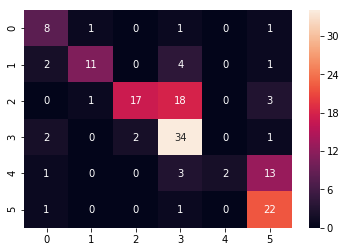


VALUE COUNTS:

3    39
2    39
5    24
4    19
1    18
0    11
dtype: int64


In [15]:
ypred = mnb.predict(Xtest)
print("ACCURACY SCORE ON TEST SET = {}".format(ac(ytest, ypred).round(4)))
print("\nCONFUSION MATRIX HEATMAP:")
sb.heatmap(cm(ytest, ypred), annot = True)
pp.show()
print("\nVALUE COUNTS:\n")
print(ytest.value_counts())